In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from gemelli.rpca import joint_rpca, feature_correlation_table
from src.helper_functions import simple_blocks

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

### Simulate data for Figure 1

300


/Users/bec5786/Desktop/Shenhav Lab/github/Capsule/code/simulations-benchmarking/src/helper_functions.py:177: RuntimeWarning: divide by zero encountered in log
  sim = np.vstack([poisson(lognormal(np.log(mu[i, :]), kappa))


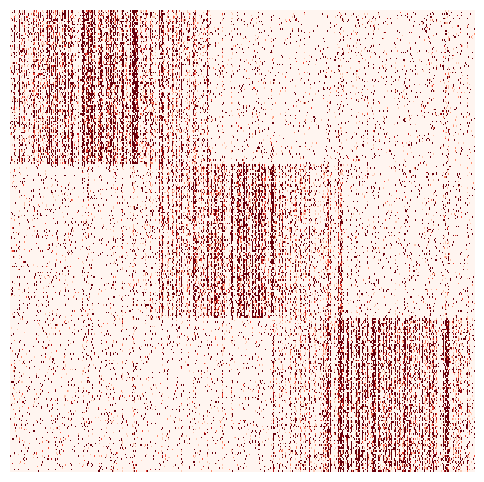

600


/Users/bec5786/Desktop/Shenhav Lab/github/Capsule/code/simulations-benchmarking/src/helper_functions.py:177: RuntimeWarning: divide by zero encountered in log
  sim = np.vstack([poisson(lognormal(np.log(mu[i, :]), kappa))


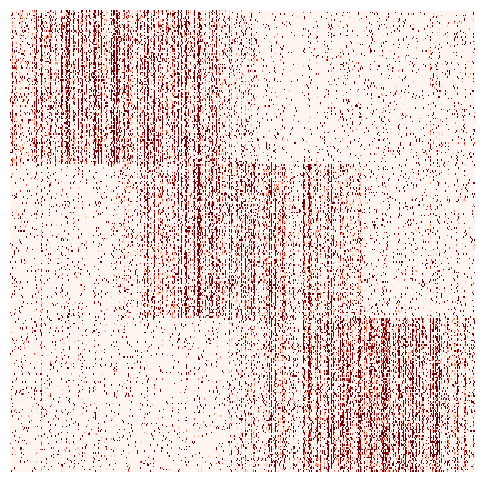

900


/Users/bec5786/Desktop/Shenhav Lab/github/Capsule/code/simulations-benchmarking/src/helper_functions.py:177: RuntimeWarning: divide by zero encountered in log
  sim = np.vstack([poisson(lognormal(np.log(mu[i, :]), kappa))


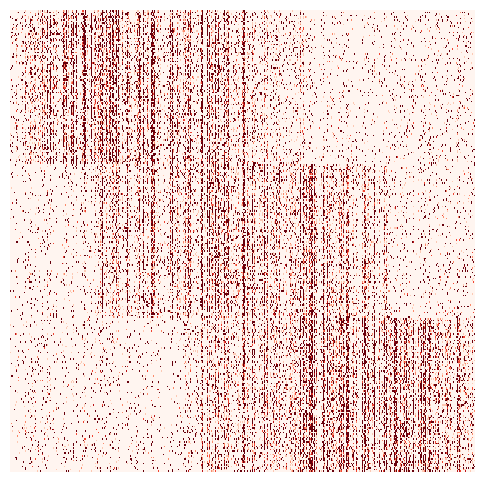

In [2]:
n_samples = 300
n_features = 1500 * 2
tables_example = {}

#set seed for reproducibility
np.random.seed(42)

for p_overlap, omic_id in zip([0.1, 0.2, 0.3], ['omic1', 'omic2', 'omic3']): 
    
    overlap_ = int(n_features * p_overlap)
    print(overlap_)

    # build simple three block model
    bt_base_tmp, bt_sim_tmp, mf_sim_tmp = simple_blocks(n_samples, n_features, omic_id=omic_id,
                                                        overlap=overlap_, n_blocks=3)
    tables_example[p_overlap] = bt_sim_tmp.copy()

    fig, ax2 = plt.subplots(1, 1, figsize=(6, 6))
    ax2.imshow(bt_sim_tmp.matrix_data.toarray().T, cmap='Reds', aspect='auto', interpolation='nearest', vmax=5)

    for ax in [ax2]:
        ax.set_facecolor('white')
        ax.set_axisbelow(True)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='both', which='both', length=0)

        ax.set_ylabel('')
        ax.set_xlabel('')
    
    plt.savefig('../../results/figure-1-%s.pdf' % (omic_id), 
                dpi=600, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')
    plt.savefig('../../results/figure-1-%s.png' % (omic_id), 
                dpi=600, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')
    
    plt.show()

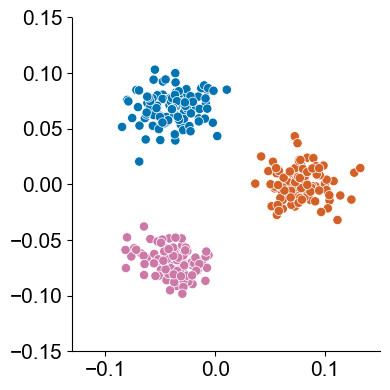

In [21]:
from matplotlib.ticker import MaxNLocator

true_lbls = list(mf_sim_tmp[mf_sim_tmp.groups == 'g0'].index[:1]) + \
            list(mf_sim_tmp[mf_sim_tmp.groups == 'g1'].index[:1]) + \
            list(mf_sim_tmp[mf_sim_tmp.groups == 'g2'].index[:1])
mf_sim_tmp['train_test'] = 'train'
mf_sim_tmp.loc[true_lbls, 'train_test'] = 'test'

pal_ = {'g0':'#0073B2',
        'g1':'#D36027',
        'g2':'#CC79A7'}

for joint_use_add in [[0.1, 0.2, 0.3]]:
    ord_, _, _ = joint_rpca([tables_example[joint_use_x].copy()
                             for joint_use_x in joint_use_add],
                            max_iterations=15,
                            sample_metadata=mf_sim_tmp,
                            train_test_column='train_test')
    ord_plt = pd.concat([ord_.samples, mf_sim_tmp], axis=1)
    ord_plt = ord_plt[ord_plt.train_test == 'train']

    fig, ax3 = plt.subplots(1, 1, figsize=(4, 4))

    sns.scatterplot(x='PC2', y='PC1', hue='groups', data=ord_plt, 
                    s=45, ax=ax3, palette=pal_)
    ax3.set_ylabel('', color='black', fontsize=13, 
                   fontname='Arial', fontweight='bold')
    ax3.set_xlabel('', color='black', fontsize=13,
                   fontname='Arial', fontweight='bold')

    ax = ax3
    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)

    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    ax.tick_params(axis='y', colors='black') #width=1, length=13)
    ax.tick_params(axis='x', colors='black') #width=1, length=13)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        tick.set_color("black")
        tick.set_fontsize(15)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_color("black")
        tick.set_fontsize(15)
    ax.legend_.remove()
    
    ax.set_ylim(-.15, .15)
    ax.set_xlim(-.13, .15)
    ax.spines['left'].set_bounds(-.15, .15)
    ax.spines['bottom'].set_bounds(-.13, .15)
    ax.xaxis.set_major_locator(MaxNLocator(3)) 
    ax.yaxis.set_major_locator(MaxNLocator(6)) 
    
    plt.tight_layout()
    plt.savefig('../../results/figure-1-scatter.pdf', 
                dpi=600, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')
    plt.savefig('../../results/figure-1-scatter.png', 
                dpi=600, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')
    plt.show()

In [4]:
feature_feature_correlation = feature_correlation_table(ord_)
feature_feature_correlation.head()

featureid,omic1_f0,omic1_f1,omic1_f2,omic1_f3,omic1_f4,omic1_f5,omic1_f6,omic1_f7,omic1_f8,omic1_f9,...,omic3_f2990,omic3_f2991,omic3_f2992,omic3_f2993,omic3_f2994,omic3_f2995,omic3_f2996,omic3_f2997,omic3_f2998,omic3_f2999
featureid,,,,,,,,,,,,,,,,,,,,,
omic1_f0,1.000000,-0.533635,-0.387181,0.068557,0.007779,0.093894,-0.899846,-0.328148,0.722112,0.692738,...,-0.210761,-0.890236,-0.907203,0.447178,0.142082,-0.728886,-0.798880,0.037243,0.189944,-0.445242
omic1_f1,-0.533635,1.000000,0.983807,0.806583,-0.827204,-0.890839,0.124649,-0.620877,0.198679,0.229663,...,0.939061,0.844627,0.215255,-0.988426,0.747071,0.936303,-0.082367,-0.828708,0.723519,0.986324
omic1_f2,-0.387181,0.983807,1.000000,0.886961,-0.914516,-0.953959,-0.046621,-0.743889,0.351976,0.393022,...,0.981078,0.755856,0.079663,-0.996720,0.852735,0.893635,-0.243757,-0.914943,0.831168,0.995982
omic1_f3,0.068557,0.806583,0.886961,1.000000,-0.961406,-0.982715,-0.476608,-0.957949,0.739475,0.749175,...,0.959375,0.369977,-0.389137,-0.848964,0.973229,0.587181,-0.654275,-0.940453,0.981379,0.847267
omic1_f4,0.007779,-0.827204,-0.914516,-0.961406,1.000000,0.980641,0.428877,0.931898,-0.657046,-0.715040,...,-0.956769,-0.461742,0.239012,0.893499,-0.987619,-0.686841,0.580145,0.997631,-0.973534,-0.895866


In [5]:
# Transform it in a links data frame (3 columns only):
links = feature_feature_correlation.stack()
links.index.set_names(['axis1', 'axis2'], inplace=True)
links = links.reset_index()
links.columns = ['var1', 'var2', 'value']
links.head()

,var1,var2,value
0,omic1_f0,omic1_f0,1.000000
1,omic1_f0,omic1_f1,-0.533635
2,omic1_f0,omic1_f2,-0.387181
3,omic1_f0,omic1_f3,0.068557
4,omic1_f0,omic1_f4,0.007779


In [6]:
# Keep only correlations within a threshold -- this is for fig clarity
links_filtered = links.loc[(links.value.abs() > 0.8)]
links_filtered.head()

,var1,var2,value
0,omic1_f0,omic1_f0,1.000000
6,omic1_f0,omic1_f6,-0.899846
12,omic1_f0,omic1_f12,-0.851070
15,omic1_f0,omic1_f15,-0.892303
20,omic1_f0,omic1_f20,-0.970569


In [7]:
#sort within each omic and keep top features
feat_ids = []

for omic in ['omic1', 'omic2', 'omic3']:
    links_filtered_omic = links_filtered[(links_filtered.var1.str.contains(omic)) & 
                                         (links_filtered.var2.str.contains(omic))]
    links_filtered_omic = links_filtered_omic.sort_values(by=(['var1', 'value']), ascending=False)
    feat_ids.extend(links_filtered_omic.var2[:150])

feature_feature_correlation_sub = feature_feature_correlation.loc[feat_ids, feat_ids]

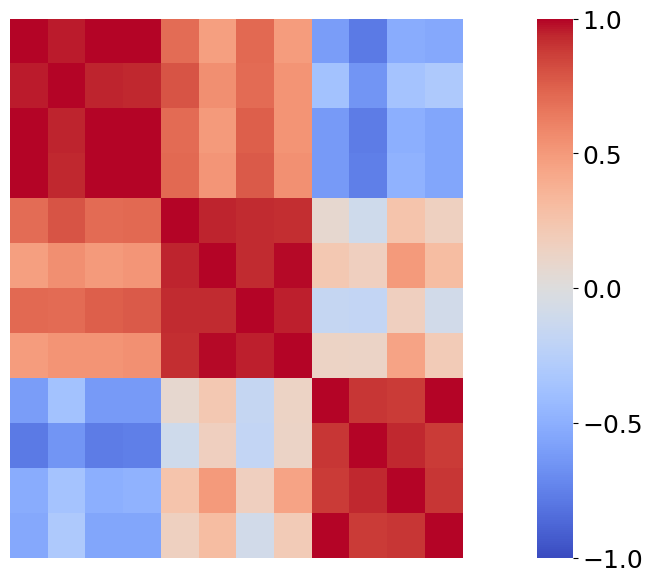

In [8]:
#take the last four features from each omic
feat_ids_sub = []

#try 4 consecutive features from each omic
start = 120
for omic in ['omic1', 'omic2', 'omic3']:
    omic_ = [x for x in feat_ids if omic in x]
    feat_ids_sub.extend(omic_[start:start+4])

feature_feature_correlation_sub2 = feature_feature_correlation.loc[feat_ids_sub, feat_ids_sub]

#plot heatmap of feature-feature correlation
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
sns.heatmap(feature_feature_correlation_sub2, 
            cmap='coolwarm', center=0, ax=ax,
            xticklabels=False, yticklabels=False,
            vmin=-1, vmax=1,
            cbar_kws={"aspect": 15,"pad":0.12,
                      "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.ylabel('')
plt.xlabel('')
#increase font size from colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)

plt.savefig('../../results/figure-1-heatmap.pdf', 
            dpi=600, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
plt.savefig('../../results/figure-1-heatmap.png', 
            dpi=600, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
plt.show()